In [3]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tifffile import imsave, imwrite
import os
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/tf_env/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/tf_env/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [10]:
# # import zipfile
# import os

# # Specify the path to your zip file and the destination folder
# zip_file_path = "MICCAI-1.zip"
# destination_folder = "MICCAI-1"

# # Ensure the destination folder exists
# os.makedirs(destination_folder, exist_ok=True)

# # Unzip the folder
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(destination_folder)

# print("Unzipping complete!")

In [13]:
import os

file_path = '/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/BraTS-MET-00821-000/BraTS-MET-00821-000-seg.nii.gz'
print("File exists:", os.path.exists(file_path))


File exists: True


In [30]:
TRAIN_DATASET_PATH = '/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/'
# test_image_flair=nib.load('MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/BraTS-MET-00821-000/BraTS-MET-00821-000-seg.nii.gz').get_fdata()
test_image_flair = nib.load('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/BraTS-MET-00821-000/BraTS-MET-00821-000-seg.nii.gz').get_fdata()
print(test_image_flair.max())

3.0


In [31]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [32]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS-MET-00821-000/BraTS-MET-00821-000-t1n.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS-MET-00821-000/BraTS-MET-00821-000-t1c.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS-MET-00821-000/BraTS-MET-00821-000-t2w.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS-MET-00821-000/BraTS-MET-00821-000-seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

[0 1 2 3]
[0 1 2 3]


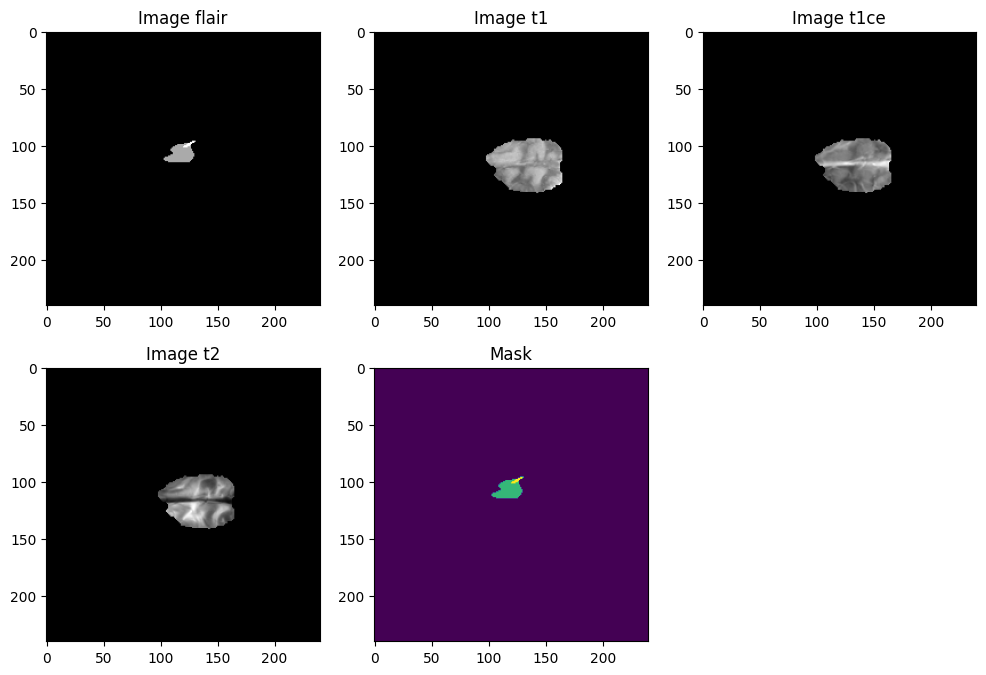

In [33]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

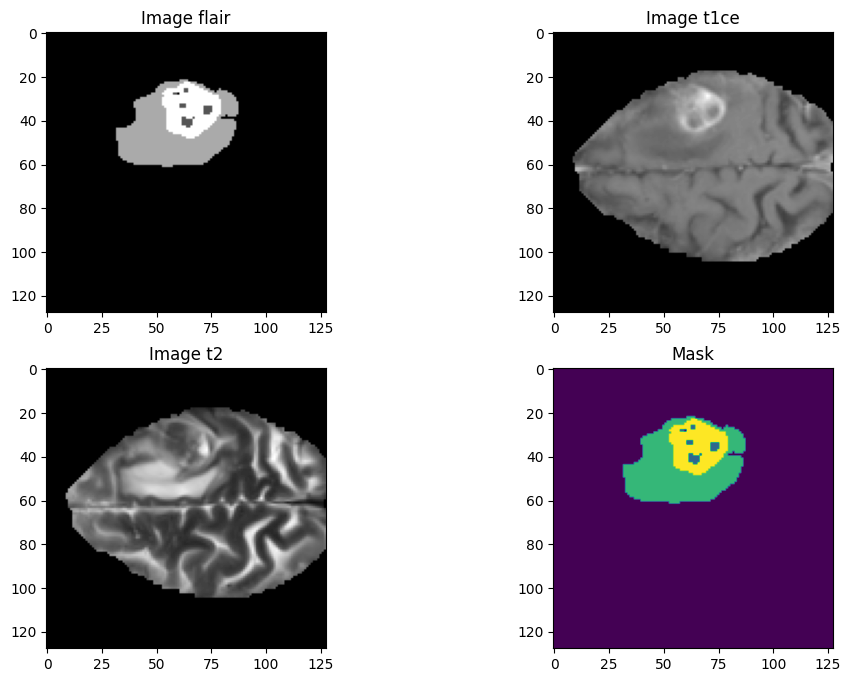

In [35]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()
####################################################################
#####################################
#End of understanding the dataset. Now get it organized.
#####################################

#Now let us apply the same as above to all the images...
#Merge channels, crop, patchify, save
#GET DATA READY =  GENERATORS OR OTHERWISE

#Keras datagenerator does ntot support 3d


In [36]:
imwrite('ml2-combined255.tif', combined_x)
np.save('ml2-combined255.npy', combined_x)
#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load('ml2-combined255.npy')

test_mask = to_categorical(test_mask, num_classes=4)

In [38]:
#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/*/*t2w.nii.gz'))
t1ce_list = sorted(glob.glob('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/*/*t1c.nii.gz'))
flair_list = sorted(glob.glob('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/*/*t2f.nii.gz'))
mask_list = sorted(glob.glob('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/*/*seg.nii.gz'))
os.makedirs('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_3channels/images', exist_ok=True)
os.makedirs('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_3channels/masks', exist_ok=True)

#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes

for img in range(262, len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   
   

Now preparing image and masks number:  262
I am useless
Now preparing image and masks number:  263
I am useless
Now preparing image and masks number:  264
I am useless
Now preparing image and masks number:  265
Save Me
Now preparing image and masks number:  266
Save Me
Now preparing image and masks number:  267
I am useless
Now preparing image and masks number:  268
I am useless
Now preparing image and masks number:  269
I am useless
Now preparing image and masks number:  270
I am useless
Now preparing image and masks number:  271
Save Me
Now preparing image and masks number:  272
Save Me
Now preparing image and masks number:  273
Save Me
Now preparing image and masks number:  274
I am useless
Now preparing image and masks number:  275
Save Me
Now preparing image and masks number:  276
I am useless
Now preparing image and masks number:  277
I am useless
Now preparing image and masks number:  278
I am useless
Now preparing image and masks number:  279
I am useless
Now preparing image an

In [45]:
pip install split-folders

3653.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [39]:
import splitfolders  # or import split_folders

input_folder = '/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_3channels/'
output_folder = '/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

In [11]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name).astype(np.float32)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)


In [12]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

AxisError: axis 3 is out of bounds for array of dimension 3

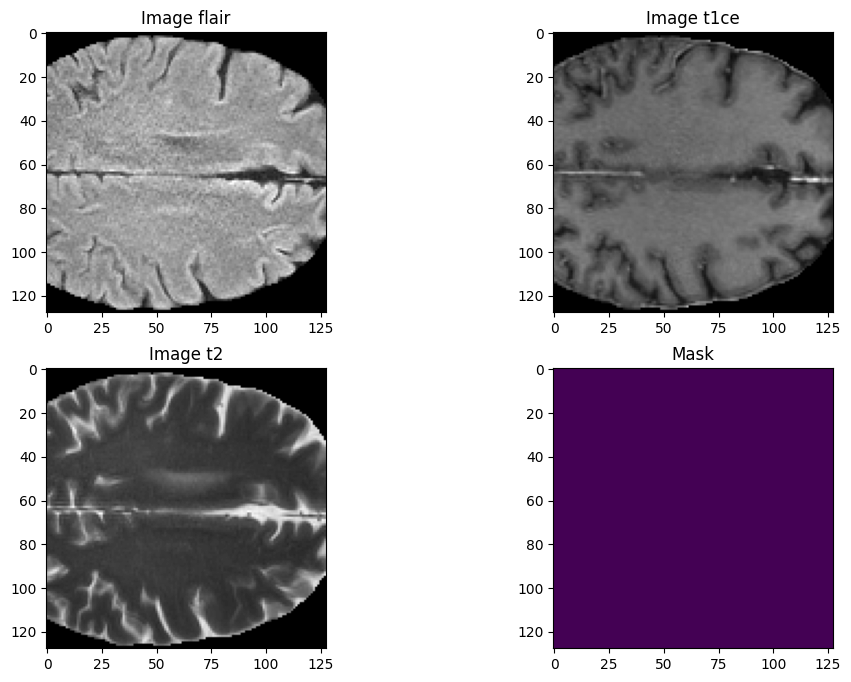

In [13]:

from matplotlib import pyplot as plt
import random

train_img_dir = "/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_128/train/images/"
train_mask_dir = "/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml3-input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [17]:
import os
import numpy as np
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random


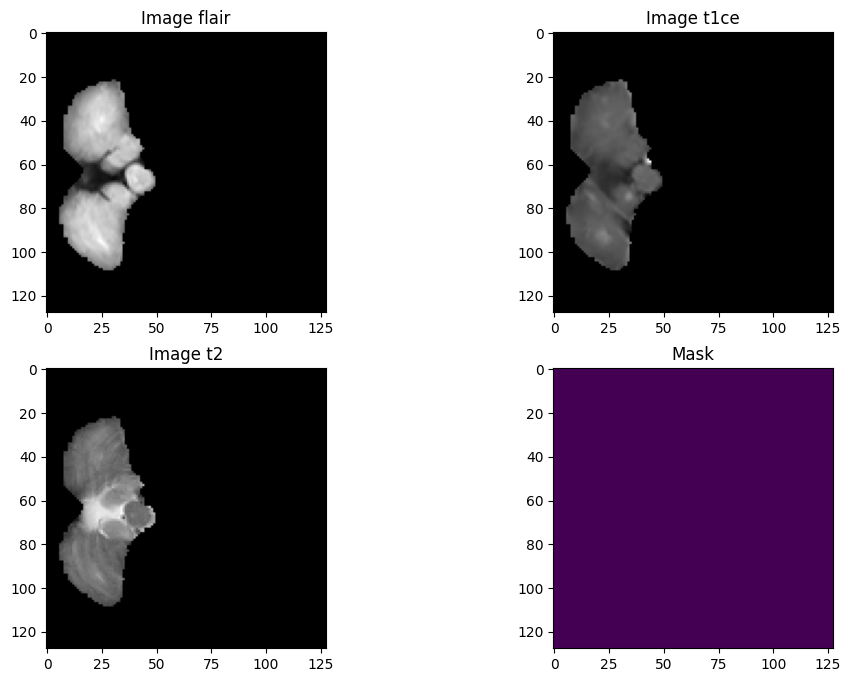

In [16]:
train_img_dir = "/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml2-input_data_128/train/images/"
train_mask_dir = "/Users/vishwangiraj/Documents/MICCAI-1/MICCAI-BraTS2024-MET-Challenge-Training_1/ml2-input_data_128/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [45]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 10.7 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import glob

columns = ['0', '1', '2', '3']
data_list = []
train_mask_list = sorted(glob.glob('ml2-input_data_128/train/masks/*.npy'))

for img in range(len(train_mask_list)):
    print(img)
    temp_image = np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    
    # Create a dictionary with default 0 counts for missing labels
    conts_dict = {col: 0 for col in columns}
    conts_dict.update(dict(zip(map(str, val), counts)))  # Update with actual counts
    
    data_list.append(conts_dict)  # Collect dictionary for each image

# Create the DataFrame from list of dictionaries
df = pd.DataFrame(data_list)

# Calculate label sums
label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['2'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

# Class weights calculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels / (n_classes * label_0)), 2)
wt1 = round((total_labels / (n_classes * label_1)), 2)
wt2 = round((total_labels / (n_classes * label_2)), 2)
wt3 = round((total_labels / (n_classes * label_3)), 2)
print(wt0, wt1, wt2, wt3)
#0.26 149.26 5.74 27.16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
0.26 106.71 7.28 47.76


DEFINING THE MODEL 

In [17]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want


################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

#Test if everything is working ok. 
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_57 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_3[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 128, 128,  │          0 │ conv3d_57[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_58 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_27[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_12    │ (None, 64, 64,    │          0 │ conv3d_58[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_59 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_12… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 64, 64,    │          0 │ conv3d_59[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_60 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_28[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_13    │ (None, 32, 32,    │          0 │ conv3d_60[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_61 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_13… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 32, 32,    │          0 │ conv3d_61[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_62 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_29[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_14    │ (None, 16, 16,    │          0 │ conv3d_62[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_63 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_14… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 16, 16,    │          0 │ conv3d_63[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_64 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_30[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_15    │ (None, 8, 8, 8,   │          0 │ conv3d_64[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)


TRAINING THE MODEL

In [18]:

train_img_dir = "ml2-input_data_128/train/images/"
train_mask_dir = "ml2-input_data_128/train/masks/"

val_img_dir = "ml2-input_data_128/val/images/"
val_mask_dir = "ml2-input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [1]:
import random
import tensorflow.keras as keras
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



NameError: name 'imageLoader' is not defined

In [20]:
pip install tensorflow==2.17.0

Note: you may need to restart the kernel to use updated packages.


In [14]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
from tensorflow.keras.optimizers import Adam

import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [ ]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

model2 = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)
model2.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model2.summary())

print(model2.input_shape)
print(model2.output_shape)

history=model2.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=50,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model2.save('ml2-brats_3d.hdf5')

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_76 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_4[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 128, 128,  │          0 │ conv3d_76[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_77 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_36[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_16    │ (None, 64, 64,    │          0 │ conv3d_77[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_78 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_16… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 64, 64,    │          0 │ conv3d_78[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_79 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_37[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_17    │ (None, 32, 32,    │          0 │ conv3d_79[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_80 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_17… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 32, 32,    │          0 │ conv3d_80[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_81 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_38[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_18    │ (None, 16, 16,    │          0 │ conv3d_81[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_82 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_18… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 16, 16,    │          0 │ conv3d_82[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_83 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_39[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_19    │ (None, 8, 8, 8,   │          0 │ conv3d_83[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_76 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_4[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 128, 128,  │          0 │ conv3d_76[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_77 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_36[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_16    │ (None, 64, 64,    │          0 │ conv3d_77[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_78 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_16… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 64, 64,    │          0 │ conv3d_78[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_79 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_37[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_17    │ (None, 32, 32,    │          0 │ conv3d_79[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_80 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_17… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 32, 32,    │          0 │ conv3d_80[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_81 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_38[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_18    │ (None, 16, 16,    │          0 │ conv3d_81[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_82 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_18… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 16, 16,    │          0 │ conv3d_82[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_83 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_39[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_19    │ (None, 8, 8, 8,   │          0 │ conv3d_83[0][0] 

 Total params: 5,645,828 (21.54 MB)

 Trainable params: 5,645,828 (21.54 MB)

 Non-trainable params: 0 (0.00 B)

None
(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)
Epoch 1/50


/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_164']. Received: the structure of inputs=*
  return output_shapes[0]


63/63 ━━━━━━━━━━━━━━━━━━━━ 2666s 42s/step - accuracy: 0.8595 - iou_score: 0.1415 - loss: 0.9731 - val_accuracy: 0.9571 - val_iou_score: 0.1650 - val_loss: 0.9623
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2585s 41s/step - accuracy: 0.9558 - iou_score: 0.2345 - loss: 0.9456 - val_accuracy: 0.9576 - val_iou_score: 0.2298 - val_loss: 0.9475
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67985s 1096s/step - accuracy: 0.9567 - iou_score: 0.2385 - loss: 0.9422 - val_accuracy: 0.9594 - val_iou_score: 0.2361 - val_loss: 0.9448
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3529s 56s/step - accuracy: 0.9555 - iou_score: 0.2386 - loss: 0.9421 - val_accuracy: 0.9584 - val_iou_score: 0.2368 - val_loss: 0.9447
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13645s 173s/step - accuracy: 0.9552 - iou_score: 0.2386 - loss: 0.9419 - val_accuracy: 0.9581 - val_iou_score: 0.2362 - val_loss: 0.9450
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6039s 97s/step - accuracy: 0.9525 - iou_score: 0.2379 - loss: 0.9417 - val_accuracy: 0.9578 - val_iou_s

In [23]:
model2.save('ml2-brats_3d.hdf5')

In [27]:
model.save('brats_3d.keras')